In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings;warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
cc= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Printing the first 5 row
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Print number of rows and columns (Dimension)
cc.shape

(7043, 21)

In [5]:
# Print the feature names
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Determine if the rows are unique
cc['customerID'].is_unique

True

In [7]:
# Satistical information of numerical features
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Printing the data type 
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Determining the % of class
cc.Churn.value_counts()/ len(cc.Churn)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [10]:
# Changing the datatype of feature 'TotalCharges'
cc['TotalCharges']= pd.to_numeric(cc['TotalCharges'], errors='coerce')

In [11]:
# Verifying the changed datatype
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# determining null value
cc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# Dropping the null value entries
cc=cc.dropna()
cc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
cc.drop('customerID', axis=1, inplace=True)

In [15]:
cc.shape

(7032, 20)

In [16]:
# Categorizing the features based on the properties
demographic=['gender','SeniorCitizen','Partner','Dependents','Churn']
Services= ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
          ,'StreamingTV','StreamingMovies', 'Churn']
account= ['tenure','PaperlessBilling', 'PaymentMethod','Contract', 'MonthlyCharges','TotalCharges','Churn']

In [17]:
# Creating dataframe from the categories formed
demographic_df= cc[demographic]
Service_df= cc[Services]
account_df= cc[account]

In [18]:
# Function to determine the % of the distribution for categorical feature
def count_plot(x, data, hue=None, ax=None):
    ax= sns.countplot(x, hue=hue, data=data,ax=ax, palette='RdPu')
    ax.set_xticklabels(ax.get_xticklabels())
    ax.set_title(x + " Distributions")
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,
                '{:.2f}%'.format((height/total)*100),fontsize=12, weight = 'bold',ha="center") 

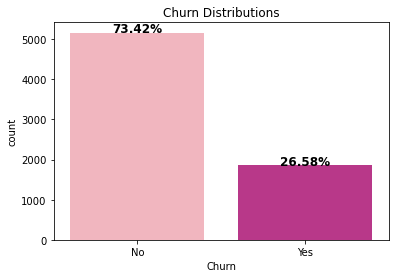

In [19]:
count_plot('Churn', cc)

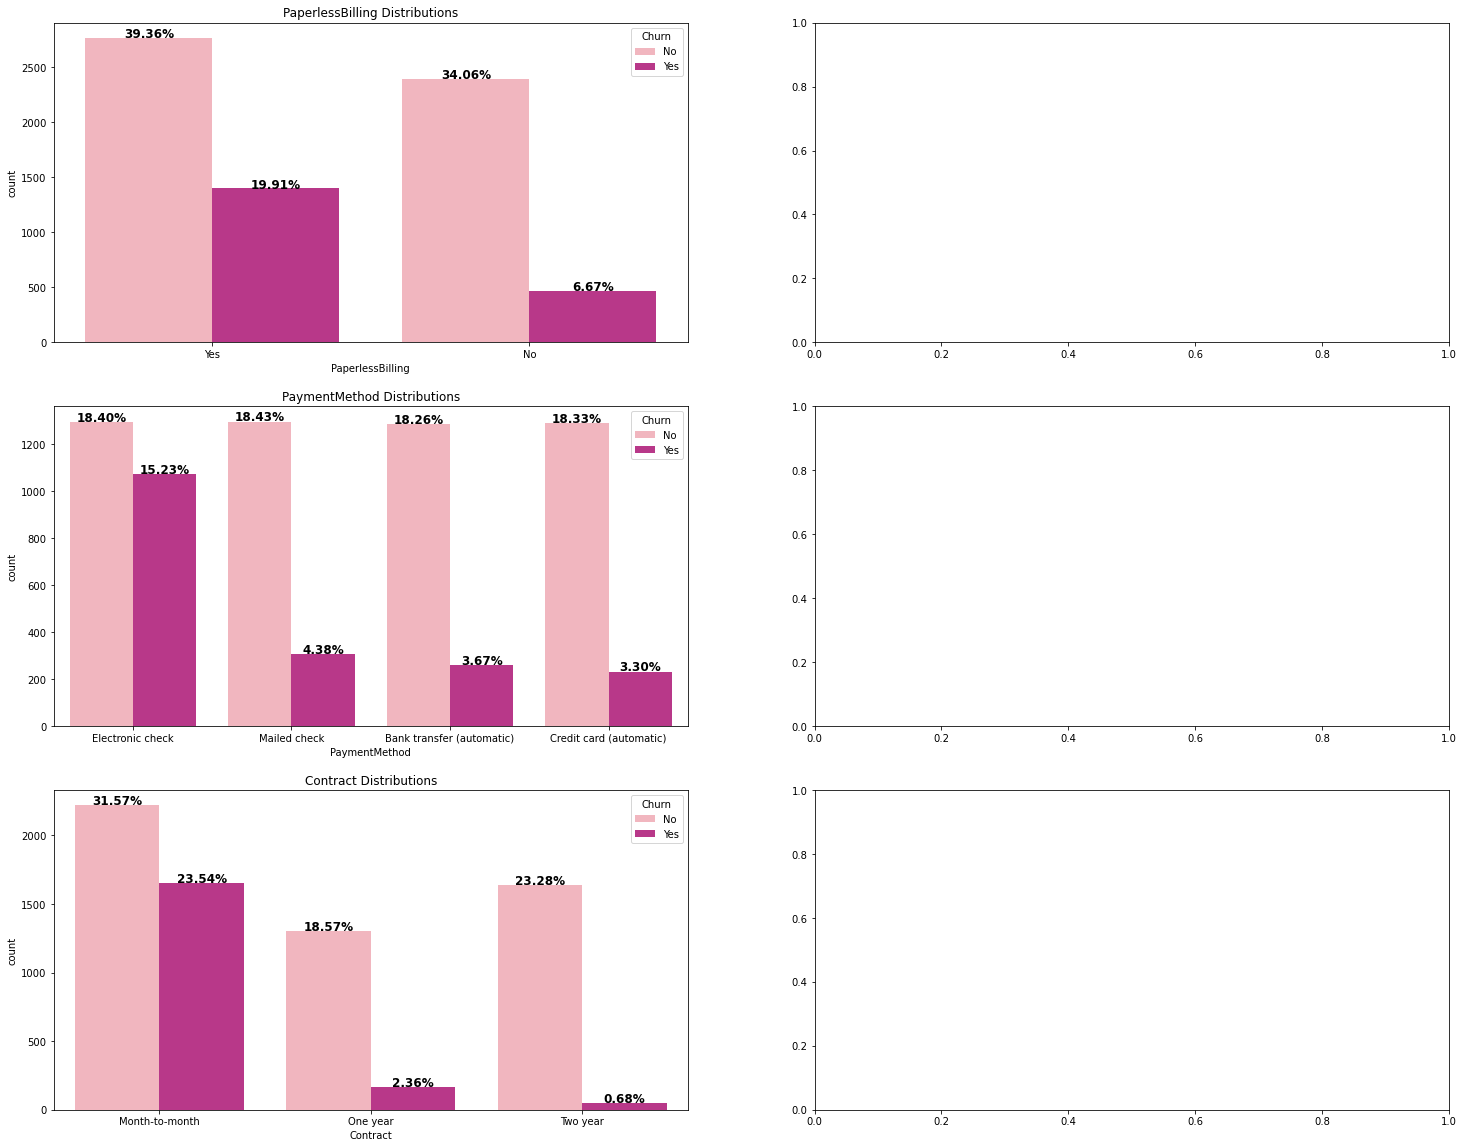

In [20]:
fig,ax = plt.subplots(3,2,figsize=(25,20))
for i,col in enumerate(account[1:4]):
    if i < 3:
        count_plot(col,account_df,hue="Churn",ax=ax[i,0])
    elif i >=3 and i < 6:
         count_plot(col,account_df,hue="Churn",ax=ax[i-3,1])
    elif i >=6:
        count_plot(col,account_df,hue="Churn",ax=ax[i-6,2])

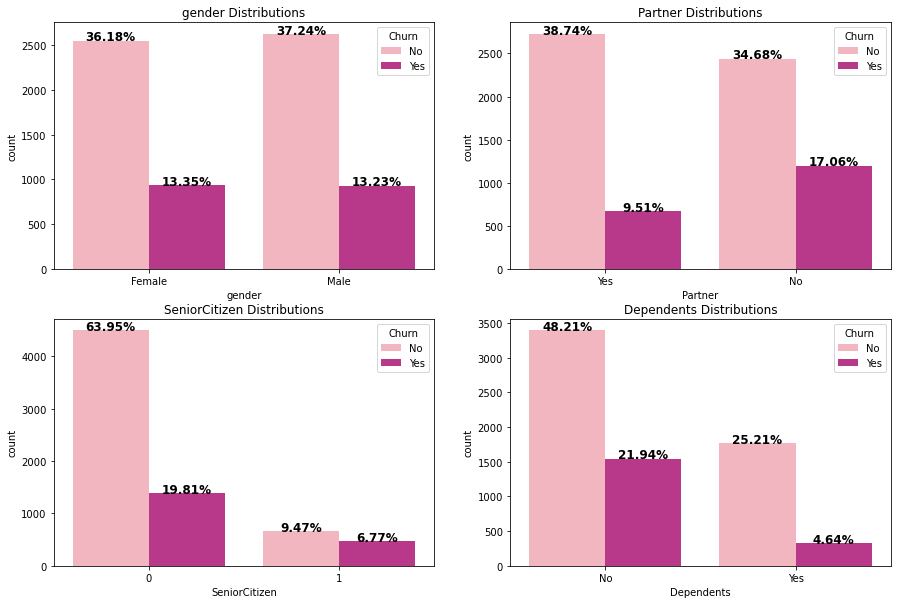

In [21]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
for i,col in enumerate(demographic[0:-1]):
    if i < 2:
        count_plot(col,demographic_df,hue="Churn",ax=ax[i,0])
    elif i >=2:
         count_plot(col,demographic_df,hue="Churn",ax=ax[i-2,1])

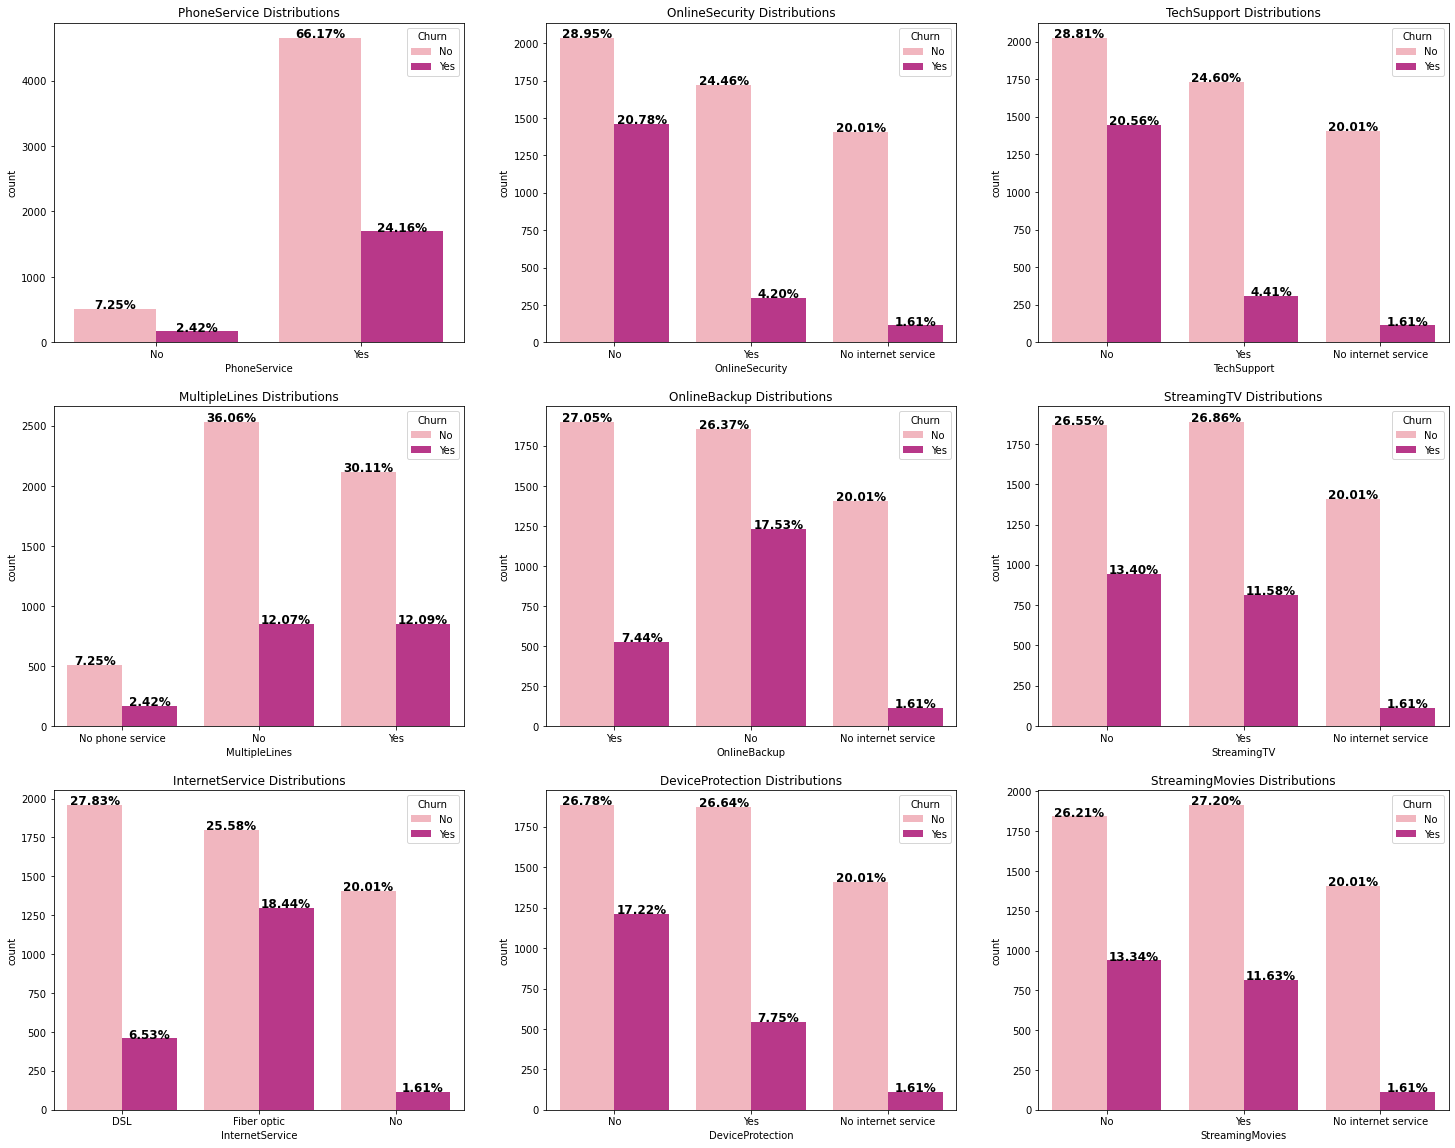

In [22]:
fig,ax = plt.subplots(3,3,figsize=(25,20))
for i,col in enumerate(Services[0:-1]):
    if i < 3:
        count_plot(col,Service_df,hue="Churn",ax=ax[i,0])
    elif i >=3 and i < 6:
         count_plot(col,Service_df,hue="Churn",ax=ax[i-3,1])
    elif i >=6:
        count_plot(col,Service_df,hue="Churn",ax=ax[i-6,2])

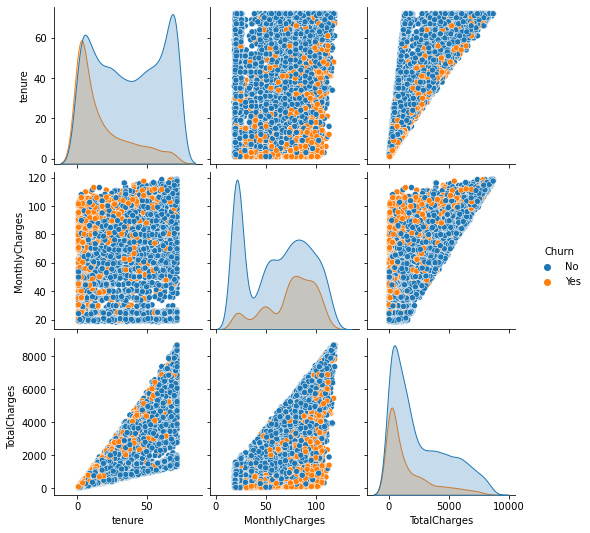

In [23]:
sns.pairplot(account_df, hue='Churn')

In [24]:
cc.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
# Function to determine unqiue feature
def unique_col(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [26]:
print(unique_col(cc))

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
None


In [27]:
def feat_engg(df):
    df['Churn']= (df.Churn=='Yes')*1
    df['Male']= (df.gender=='Male')*1
    df['Partner']= (df.Partner=='Yes')*1
    df['Dependents']= (df.Dependents=='Yes')*1
    df['PhoneService'] = (df.PhoneService=='Yes')*1
    df['MultipleLines']= (df.MultipleLines=='Yes')*1
    df= pd.concat([df, pd.get_dummies(df.InternetService, prefix='InternetService').drop('InternetService_No', axis=1)], axis=1)
    df['OnlineSecurity']= (df.OnlineSecurity=='Yes')*1
    df['OnlineBackup']= (df.OnlineBackup=='Yes')*1
    df['DeviceProtection']= (df.DeviceProtection=='Yes')*1
    df['TechSupport']= (df.TechSupport=='Yes')*1
    df['StreamingTV']= (df.StreamingTV=='Yes')*1
    df['StreamingMovies']= (df.StreamingMovies=='Yes')*1
    df=  pd.concat([df, pd.get_dummies(df.Contract, prefix='Contract', drop_first=True)], axis=1)
    df['PaperlessBilling']= (df.PaperlessBilling=='Yes')*1
    df= pd.concat([df, pd.get_dummies(df.PaymentMethod, prefix='PaymentMethod', drop_first=True)], axis=1)
    df['Sum_of_internet_services'] = df.OnlineSecurity + df.OnlineBackup + df.DeviceProtection + df.StreamingTV + df.StreamingMovies + df.TechSupport
    df = df.drop(['gender','InternetService','Contract','PaymentMethod'],axis=1)
    return df

In [28]:
eng_df= feat_engg(cc)

In [29]:
eng_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,Male,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Sum_of_internet_services
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,0,0,34,1,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,2
2,0,0,0,2,1,0,1,1,0,0,...,1,1,1,0,0,0,0,0,1,2
3,0,0,0,45,0,0,1,0,1,1,...,0,1,1,0,1,0,0,0,0,3
4,0,0,0,2,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [30]:
eng_df.shape

(7032, 25)

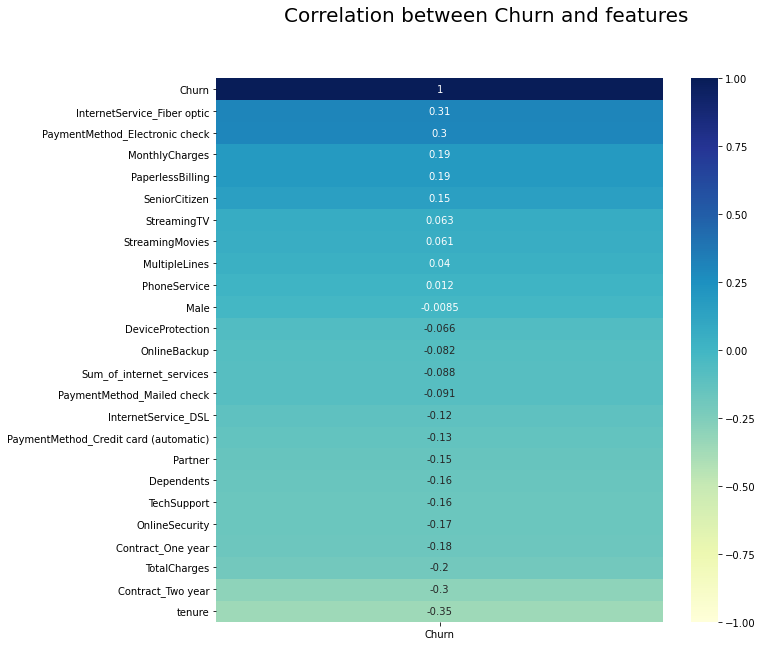

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Correlation between Churn and features',fontsize=20)
ax=sns.heatmap(eng_df.corr()[["Churn"]].sort_values("Churn"),vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax);
ax.invert_yaxis()

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

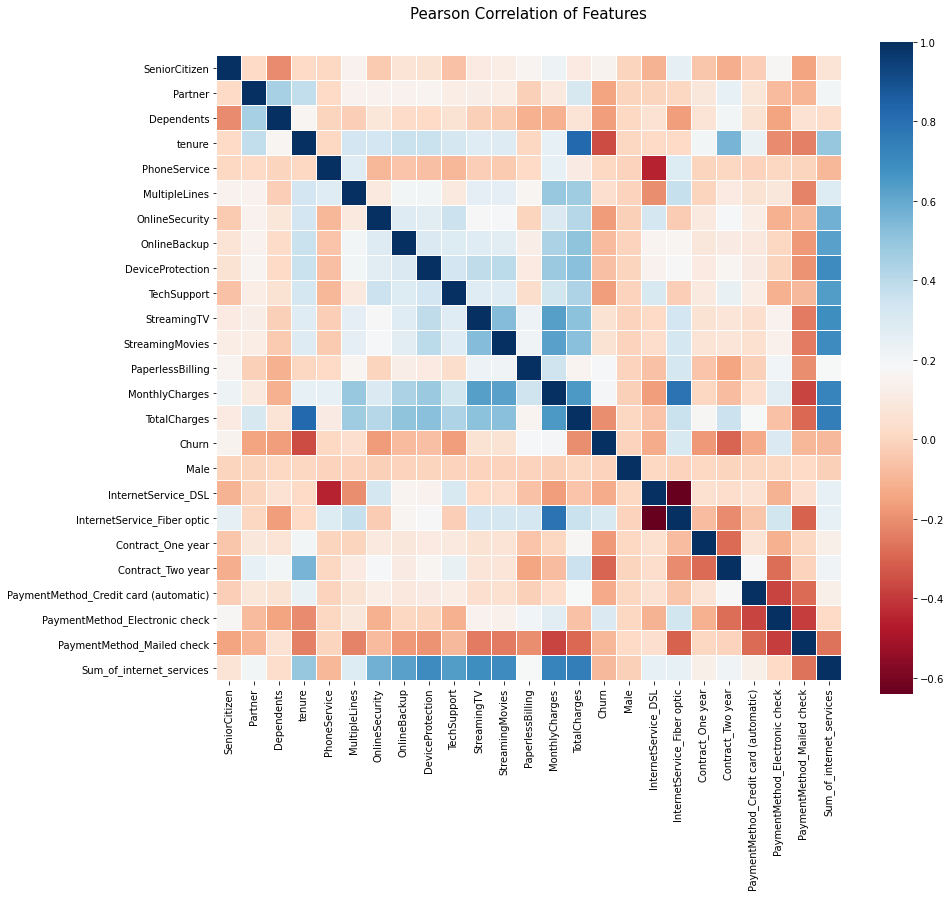

In [33]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(eng_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

In [34]:
from sklearn.model_selection import train_test_split

X= eng_df.drop('Churn', axis=1)
y= eng_df['Churn']

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=42, shuffle=True)

Logistic: f1=0.562 auc=0.650
Best Threshold=0.326676, F-Score=0.637


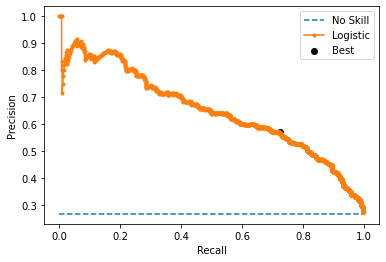

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from numpy import argmax

lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_probs= lr.predict_proba(X_test)
lr_probs= lr_probs[:,1]
'''fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')'''
#y_pred= lr.predict(X_test)

lr_precision, lr_recall, thresholds= precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc= f1_score(y_test,y_pred), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.scatter(lr_recall[ix], lr_precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [53]:
from sklearn.model_selection import cross_validate

lr1 = LogisticRegression(random_state=42)
threshold=0.326
scores = cross_validate(lr,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
print( np.mean(np.array(scores['test_roc_auc'])))
print(np.mean(np.array(scores['test_average_precision'])))

0.8412513266395513
0.6507220857955682


In [54]:
cross_validate?